## Problem Definition and Goal Setting

**Goal to achieve**: Predict PD progression (MDS-UPDRS) using motor data.

**Smart Goals**:
- **Specific**: Develop an ML model to predict the progression of PD (MDS-UPDRS) using unimodal motor data. 
- **Measurable**: Evaluate the model's performance using appropriate regression metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R²). 
- **Achievable**: Use PPMI data.

**Determine type of ML problem**: *Regression*; the task is to predict the continuous progression of motor symptoms over time.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/larsheijnen/Thesis/data/MDS-UPDRS_Part_III_21Mar2025.csv')

In [3]:
motor_features = [
    'PATNO', 'EVENT_ID', 'INFODT',  # Identifying information
    
    # MDS-UPDRS Part III scores
    'NP3SPCH', 'NP3FACXP', 
    'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 'NP3RIGLL',  # Rigidity
    'NP3FTAPR', 'NP3FTAPL',  # Finger tapping
    'NP3HMOVR', 'NP3HMOVL',  # Hand movements
    'NP3PRSPR', 'NP3PRSPL',  # Pronation-supination
    'NP3TTAPR', 'NP3TTAPL',  # Toe tapping
    'NP3LGAGR', 'NP3LGAGL',  # Leg agility
    'NP3RISNG',  # Arising from chair
    'NP3GAIT', 'NP3FRZGT',  # Gait and freezing
    'NP3PSTBL',  # Postural stability
    'NP3POSTR',  # Posture
    'NP3BRADY',  # Body bradykinesia
    'NP3PTRMR', 'NP3PTRML',  # Postural tremor
    'NP3KTRMR', 'NP3KTRML',  # Kinetic tremor
    'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ', 'NP3RTCON',  # Rest tremor
    'NP3TOT'  # Total score
]

# Create the DataFrame with selected features (only keep columns that exist in the data)
motor_df = data[[col for col in motor_features if col in data.columns]]

# Display the first few rows to verify the contents
print(f"Motor assessment DataFrame shape: {motor_df.shape}")
motor_df.head()

Motor assessment DataFrame shape: (32346, 37)


,PATNO,EVENT_ID,INFODT,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,NP3RIGRL,NP3RIGLL,...,NP3PTRML,NP3KTRMR,NP3KTRML,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,NP3TOT
0,3000,BL,02/2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,3000,V04,03/2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3000,V06,02/2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,3000,V08,03/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,3000,V10,03/2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0


NP3TOT: 19.28% missing
NP3TTAPR: 5.42% missing
NP3PSTBL: 5.42% missing
NP3TTAPL: 5.41% missing
NP3FRZGT: 5.37% missing
NP3RIGLL: 5.35% missing
NP3HMOVL: 5.34% missing
NP3RTCON: 5.34% missing
NP3RIGRL: 5.34% missing
NP3FTAPL: 5.34% missing
NP3KTRMR: 5.34% missing
NP3PTRML: 5.34% missing
NP3PRSPL: 5.34% missing
NP3RTALJ: 5.34% missing
NP3RIGRU: 5.33% missing
NP3RIGN: 5.33% missing
NP3KTRML: 5.33% missing
NP3RTALL: 5.33% missing
NP3PTRMR: 5.33% missing
NP3BRADY: 5.33% missing
NP3POSTR: 5.33% missing
NP3RTARU: 5.33% missing
NP3RISNG: 5.33% missing
NP3RTARL: 5.33% missing
NP3RIGLU: 5.33% missing
NP3RTALU: 5.33% missing
NP3PRSPR: 5.33% missing
NP3GAIT: 5.33% missing
NP3LGAGL: 5.33% missing
NP3FTAPR: 5.33% missing
NP3HMOVR: 5.33% missing
NP3LGAGR: 5.33% missing
NP3FACXP: 5.32% missing
NP3SPCH: 5.32% missing
EVENT_ID: 0.00% missing
INFODT: 0.00% missing
PATNO: 0.00% missing


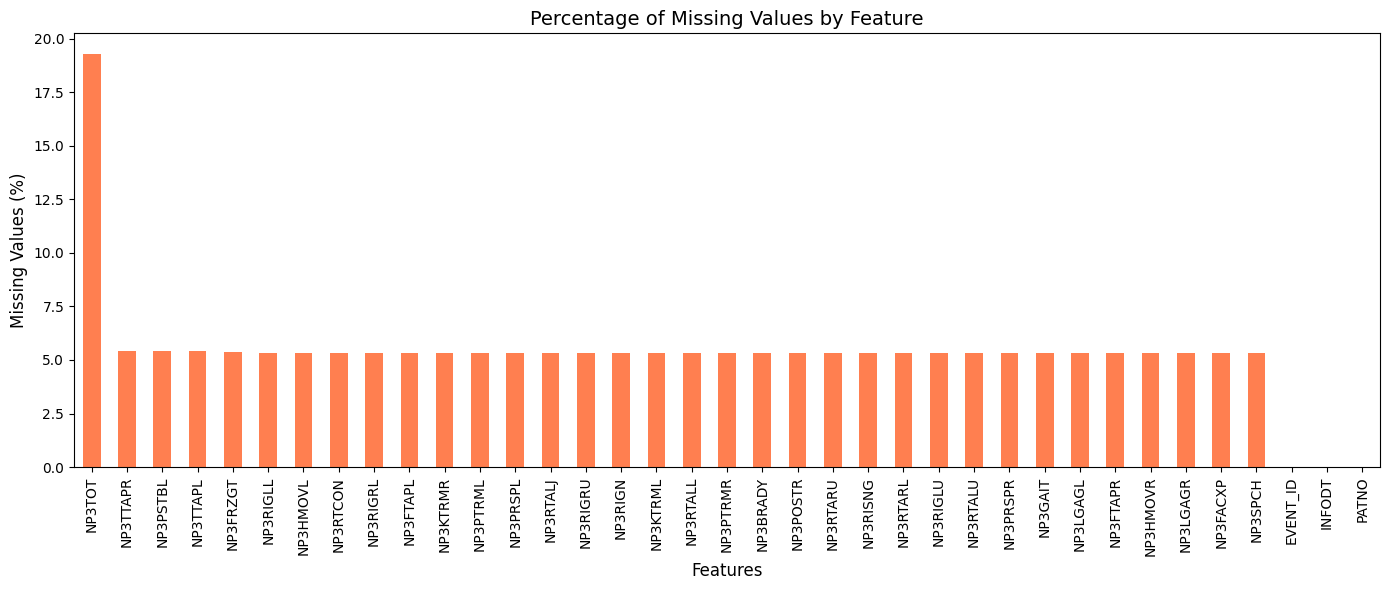

In [4]:
missing_percentage = motor_df.isnull().mean() * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

for column, percentage in missing_percentage_sorted.items():
    print(f"{column}: {percentage:.2f}% missing")

plt.figure(figsize=(14, 6))
missing_percentage_sorted.plot(kind='bar', color='coral')
plt.title('Percentage of Missing Values by Feature', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Missing Values (%)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Interpretation**: NP3TOT is missing the most. To remove rows with NaN values.

In [5]:
motor_df = motor_df.dropna(subset=['NP3TOT'])

print(f"Updated DataFrame shape: {motor_df.shape}")
motor_df.head()

Updated DataFrame shape: (26109, 37)


,PATNO,EVENT_ID,INFODT,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,NP3RIGRL,NP3RIGLL,...,NP3PTRML,NP3KTRMR,NP3KTRML,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,NP3TOT
0,3000,BL,02/2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,3000,V04,03/2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3000,V06,02/2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,3000,V08,03/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,3000,V10,03/2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0


PATNO: 0.00% missing
NP3LGAGL: 0.00% missing
NP3GAIT: 0.00% missing
NP3FRZGT: 0.00% missing
NP3PSTBL: 0.00% missing
NP3POSTR: 0.00% missing
NP3BRADY: 0.00% missing
NP3PTRMR: 0.00% missing
NP3PTRML: 0.00% missing
NP3KTRMR: 0.00% missing
NP3KTRML: 0.00% missing
NP3RTARU: 0.00% missing
NP3RTALU: 0.00% missing
NP3RTARL: 0.00% missing
NP3RTALL: 0.00% missing
NP3RTALJ: 0.00% missing
NP3RTCON: 0.00% missing
NP3RISNG: 0.00% missing
NP3LGAGR: 0.00% missing
EVENT_ID: 0.00% missing
NP3TTAPL: 0.00% missing
INFODT: 0.00% missing
NP3SPCH: 0.00% missing
NP3FACXP: 0.00% missing
NP3RIGN: 0.00% missing
NP3RIGRU: 0.00% missing
NP3RIGLU: 0.00% missing
NP3RIGRL: 0.00% missing
NP3RIGLL: 0.00% missing
NP3FTAPR: 0.00% missing
NP3FTAPL: 0.00% missing
NP3HMOVR: 0.00% missing
NP3HMOVL: 0.00% missing
NP3PRSPR: 0.00% missing
NP3PRSPL: 0.00% missing
NP3TTAPR: 0.00% missing
NP3TOT: 0.00% missing


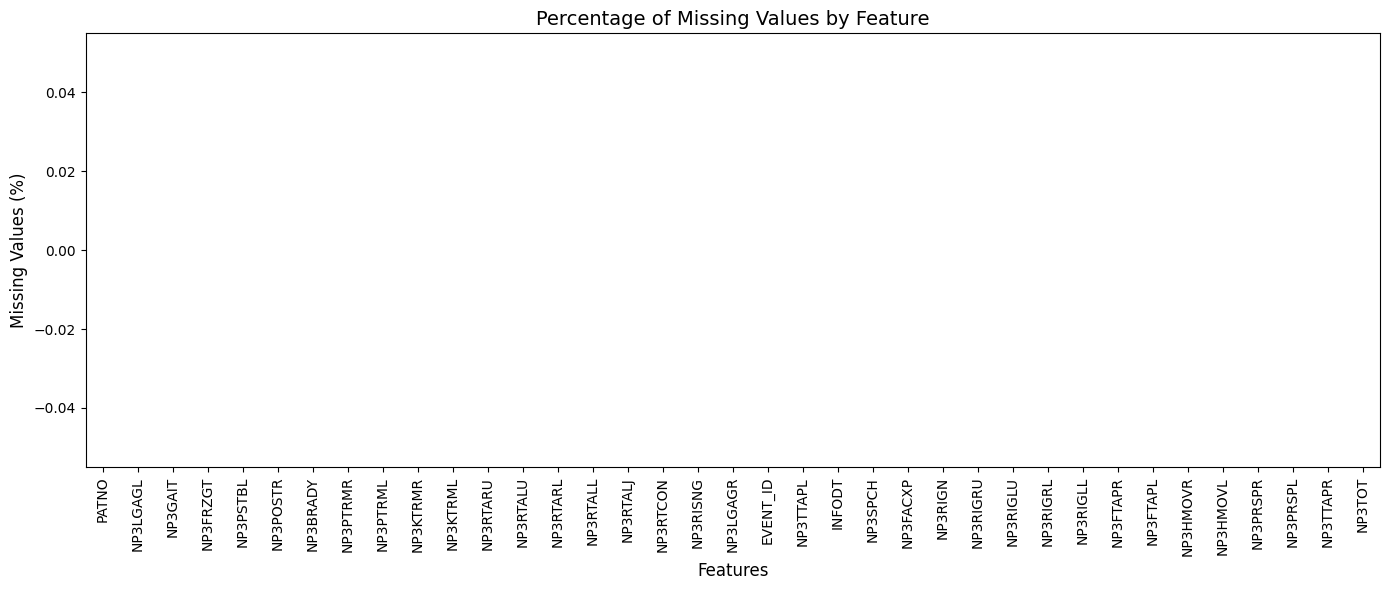

In [6]:
missing_percentage = motor_df.isnull().mean() * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

for column, percentage in missing_percentage_sorted.items():
    print(f"{column}: {percentage:.2f}% missing")

plt.figure(figsize=(14, 6))
missing_percentage_sorted.plot(kind='bar', color='coral')
plt.title('Percentage of Missing Values by Feature', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Missing Values (%)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Interpretation**: After removing rows with NaN in NP3TOT, no other features have missing values left!

In [7]:
# Define a function to detect and remove outliers using the IQR method
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Apply the function to the 'NP3TOT' column
motor_df_no_outliers = remove_outliers_iqr(motor_df, column)

print(f"Original DataFrame shape: {motor_df.shape}")
print(f"DataFrame shape after removing outliers: {motor_df_no_outliers.shape}")
motor_df_no_outliers.head()

Original DataFrame shape: (26109, 37)
DataFrame shape after removing outliers: (25891, 37)


,PATNO,EVENT_ID,INFODT,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,NP3RIGRL,NP3RIGLL,...,NP3PTRML,NP3KTRMR,NP3KTRML,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,NP3TOT
0,3000,BL,02/2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,3000,V04,03/2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3000,V06,02/2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,3000,V08,03/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,3000,V10,03/2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0


**Interpretation**: Removing outliers removed 218 rows. 